# Plotting with seaborn

ScmData provides limited support for plotting. However, we make it as easy as possible to return data in a format which can be used with the [seaborn](https://seaborn.pydata.org/index.html) plotting library. Given the power of this library, we recommend having a look through its documentation if you want to make anything more than the most basic plots.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from scmdata import ScmDataFrame
from scmdata.plotting import CMIP6_SCENARIO_COLOURS

## Data

For this notebook we use the RCMIP radiative forcings, available at rcmip.org.

In [2]:
rcmip_db = ScmDataFrame("rcmip-radiative-forcing-annual-means-v4-0-0.csv")
rcmip_db.head()

time                                                                                                   1750-01-01 00:00:00  \
model scenario region variable                                           unit  activity_id    mip_era                        
AIM   rcp60    World  Radiative Forcing                                  W/m^2 not_applicable CMIP5                    NaN   
                      Radiative Forcing|Anthropogenic                    W/m^2 not_applicable CMIP5                    NaN   
                      Radiative Forcing|Anthropogenic|Aerosols           W/m^2 not_applicable CMIP5                    NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2 not_applicable CMIP5                    NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2 not_applicable CMIP5                    NaN   

time                                                                                                   1751-01-01 00:00:00  \
model scenario region variable                                           unit  activity_id    mip_era                        
AIM   rcp60    World  Radiative Forcing                                  W/m^2 not_applicable CMIP5                    NaN   
                      Radiative Forcing|Anthropogenic                    W/m^2 not_applicable CMIP5                    NaN   
                      Radiative Forcing|Anthropogenic|Aerosols           W/m^2 not_applicable CMIP5                    NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2 not_applicable CMIP5                    NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2 not_applicable CMIP5                    NaN   

time                                                                                                   1752-01-01 00:00:00  \
model scenario region variable                                           unit  activity_id    mip_era                        
AIM   rcp60    World  Radiative Forcing                                  W/m^2 not_applicable CMIP5                    NaN   
                      Radiative Forcing|Anthropogenic                    W/m^2 not_applicable CMIP5                    NaN   
                      Radiative Forcing|Anthropogenic|Aerosols           W/m^2 not_applicable CMIP5                    NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2 not_applicable CMIP5                    NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2 not_applicable CMIP5                    NaN   

time                                                                                                   1753-01-01 00:00:00  \
model scenario region variable                                           unit  activity_id    mip_era                        
AIM   rcp60    World  Radiative Forcing                                  W/m^2 not_applicable CMIP5                    NaN   
                      Radiative Forcing|Anthropogenic                    W/m^2 not_applicable CMIP5                    NaN   
                      Radiative Forcing|Anthropogenic|Aerosols           W/m^2 not_applicable CMIP5                    NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2 not_applicable CMIP5                    NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2 not_applicable CMIP5                    NaN   

time                                                                                                   1754-01-01 00:00:00  \
model scenario region variable                                           unit  activity_id    mip_era                        
AIM   rcp60    World  Radiative Forcing                                  W/m^2 not_applicable CMIP5                    NaN   
                      Radiative Forcing|Anthropogenic                    W/m^2 not_applica

## Plotting with ScmDataFrame

For the most common plotting patterns, we provide a very simple `lineplot` method in `ScmDataFrame`.

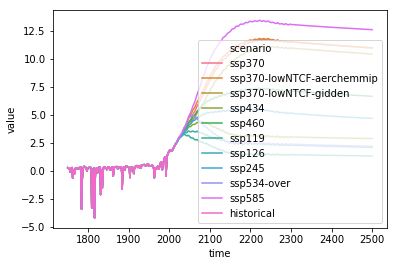

In [3]:
out = rcmip_db.filter(variable="Effective Radiative Forcing").lineplot()
out

``kwargs`` passed to this method are given directly to [``seaborn.lineplot``](https://seaborn.pydata.org/generated/seaborn.lineplot.html), which allows an extra layer of control.

For example, we can plot on slightly bigger axes, make the lines slightly transparent, add markers for the different models, specify the colour to use for each scenario and specify the order to display the scenarios in.

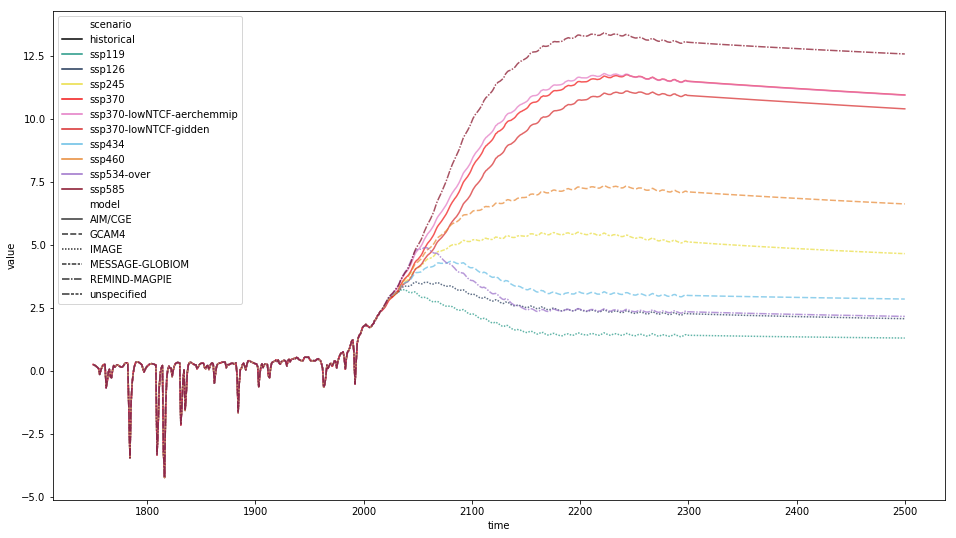

In [4]:
scenario_colours = {
    "historical": "black",
    "ssp119": "#1e9583",
    "ssp126": "#1d3354",
    "ssp245": "#e9dc3d",
    "ssp370": "#f11111",
    "ssp370-lowNTCF-aerchemmip": "tab:pink",
    "ssp370-lowNTCF-gidden": "tab:red",
    "ssp434": "#63bce4",
    "ssp460": "#e78731",
    "ssp534-over": "#996dc8",
    "ssp585": "#830b22",
}
ax = plt.figure(figsize=(16, 9)).add_subplot(111)
rcmip_db.filter(variable="Effective Radiative Forcing").lineplot(
    ax=ax,
    hue="scenario",
    palette=scenario_colours,
    hue_order=scenario_colours.keys(),
    style="model",
    alpha=0.7,
)

## Plotting with seaborn

If you wish to make plots which are more complex than this most basic pattern, a combination of seaborn and pandas reshaping is your best bet.

### Plotting on a grid

Often we wish to look at lots of different variables at once. Seaborn allows this sort of 'gridded' plotting, as shown below.

In [5]:
vars_to_plot = ["Effective Radiative Forcing"] + [
    "Effective Radiative Forcing|{}".format(v)
    for v in [
        "Anthropogenic",
        "Anthropogenic|Aerosols",
        "Anthropogenic|CO2",
        "Anthropogenic|CH4",
        "Anthropogenic|N2O",
    ]
]
vars_to_plot

['Effective Radiative Forcing',
 'Effective Radiative Forcing|Anthropogenic',
 'Effective Radiative Forcing|Anthropogenic|Aerosols',
 'Effective Radiative Forcing|Anthropogenic|CO2',
 'Effective Radiative Forcing|Anthropogenic|CH4',
 'Effective Radiative Forcing|Anthropogenic|N2O']

In [6]:
seaborn_df = rcmip_db.filter(variable=vars_to_plot).long_data()
seaborn_df.head()

,model,scenario,region,variable,unit,activity_id,mip_era,time,value
0,AIM/CGE,ssp370,World,Effective Radiative Forcing,W/m^2,not_applicable,CMIP6,1750-01-01 00:00:00,0.259367
1,AIM/CGE,ssp370,World,Effective Radiative Forcing,W/m^2,not_applicable,CMIP6,1751-01-01 00:00:00,0.242788
2,AIM/CGE,ssp370,World,Effective Radiative Forcing,W/m^2,not_applicable,CMIP6,1752-01-01 00:00:00,0.214656
3,AIM/CGE,ssp370,World,Effective Radiative Forcing,W/m^2,not_applicable,CMIP6,1753-01-01 00:00:00,0.179488
4,AIM/CGE,ssp370,World,Effective Radiative Forcing,W/m^2,not_applicable,CMIP6,1754-01-01 00:00:00,0.145354


With the output of `.long_data()` we can directly use [``seaborn.relplot``](https://seaborn.pydata.org/generated/seaborn.relplot.html).

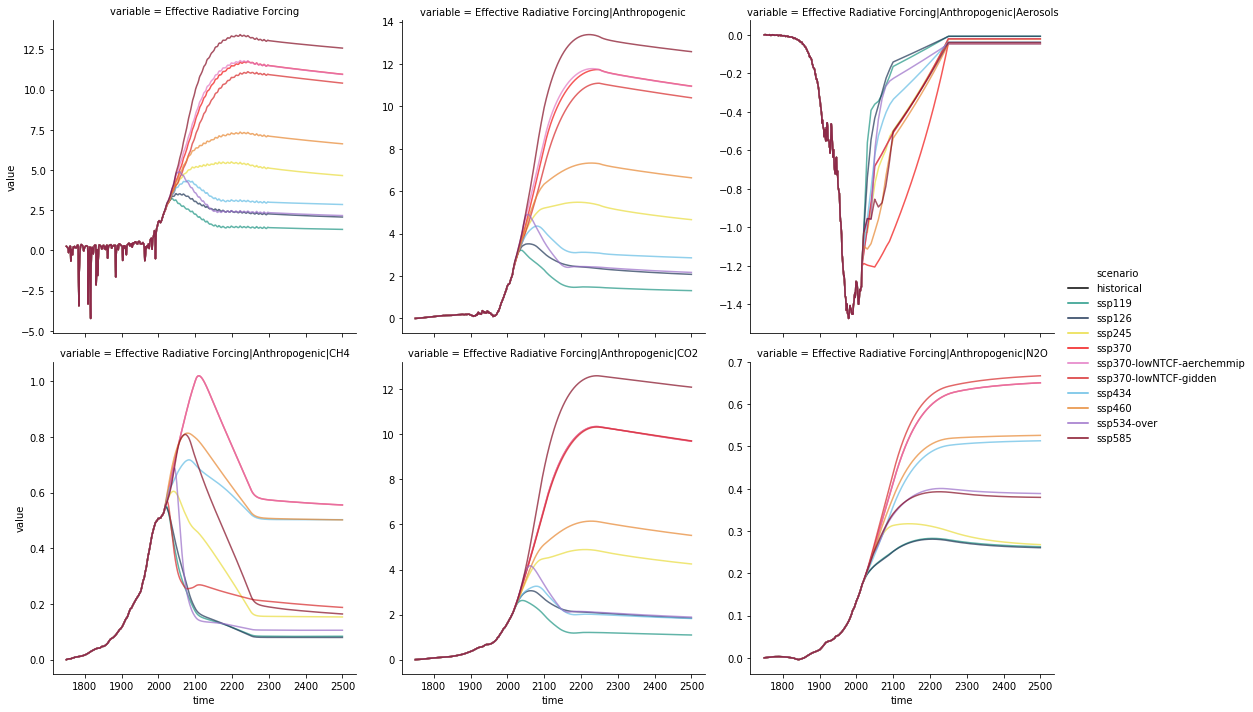

In [9]:
sns.relplot(
    data=seaborn_df,
    x="time",
    y="value",
    col="variable",
    col_wrap=3,
    hue="scenario",
    palette=CMIP6_SCENARIO_COLOURS,
    hue_order=CMIP6_SCENARIO_COLOURS.keys(),
    alpha=0.7,
    facet_kws={"sharey": False},
    kind="line",
)

### Variable scatter plots

Sometimes we don't want to plot against time, rather we want to plot variables against each other. For example, we might want to see how the effective radiative forcings relate to each other in the different scenarios. In such a case we can reshape the data using pandas before using seaborn.

In [10]:
ts = rcmip_db.filter(variable=vars_to_plot[:4]).timeseries()
ts.head()

time                                                                                                                      1750-01-01 00:00:00  \
model   scenario                  region variable                                           unit  activity_id    mip_era                        
AIM/CGE ssp370                    World  Effective Radiative Forcing                        W/m^2 not_applicable CMIP6               0.259367   
                                         Effective Radiative Forcing|Anthropogenic          W/m^2 not_applicable CMIP6               0.000000   
                                         Effective Radiative Forcing|Anthropogenic|Aerosols W/m^2 not_applicable CMIP6               0.000000   
                                         Effective Radiative Forcing|Anthropogenic|CO2      W/m^2 not_applicable CMIP6               0.000000   
        ssp370-lowNTCF-aerchemmip World  Effective Radiative Forcing                        W/m^2 not_applicable CMIP6               0.259367   

time                                                                                                                      1751-01-01 00:00:00  \
model   scenario                  region variable                                           unit  activity_id    mip_era                        
AIM/CGE ssp370                    World  Effective Radiative Forcing                        W/m^2 not_applicable CMIP6               0.242788   
                                         Effective Radiative Forcing|Anthropogenic          W/m^2 not_applicable CMIP6               0.001756   
                                         Effective Radiative Forcing|Anthropogenic|Aerosols W/m^2 not_applicable CMIP6               0.000836   
                                         Effective Radiative Forcing|Anthropogenic|CO2      W/m^2 not_applicable CMIP6               0.000824   
        ssp370-lowNTCF-aerchemmip World  Effective Radiative Forcing                        W/m^2 not_applicable CMIP6               0.242788   

time                                                                                                                      1752-01-01 00:00:00  \
model   scenario                  region variable                                           unit  activity_id    mip_era                        
AIM/CGE ssp370                    World  Effective Radiative Forcing                        W/m^2 not_applicable CMIP6               0.214656   
                                         Effective Radiative Forcing|Anthropogenic          W/m^2 not_applicable CMIP6               0.003698   
                                         Effective Radiative Forcing|Anthropogenic|Aerosols W/m^2 not_applicable CMIP6               0.001212   
                                         Effective Radiative Forcing|Anthropogenic|CO2      W/m^2 not_applicable CMIP6               0.001647   
        ssp370-lowNTCF-aerchemmip World  Effective Radiative Forcing                        W/m^2 not_applicable CMIP6               0.214656   

time                                                                                                                      1753-01-01 00:00:00  \
model   scenario                  region variable                                           unit  activity_id    mip_era                        
AIM/CGE ssp370                    World  Effective Radiative Forcing                        W/m^2 not_applicable CMIP6               0.179488   
                                         Effective Radiative Forcing|Anthropogenic          W/m^2 not_applicable CMIP6               0.004707   
                                         Effective Radiative Forcing|Anthropogenic|Aerosols W/m^2 not_applicable CMIP6               0.000801   
                                         Effective Radiative Forcing|Anthropogenic|CO2      W/m^2 not_applicable CMIP6               0.002330   
        ssp370-lowNTCF-aerchemmip World  Effective Radiative Forcing              

In [11]:
ts_reshaped = ts.unstack("variable").stack("time").reset_index("scenario")
ts_reshaped.head()

variable                                                        scenario  \
model   region unit  activity_id    mip_era time                           
AIM/CGE World  W/m^2 not_applicable CMIP6   1750-01-01 00:00:00   ssp370   
                                            1751-01-01 00:00:00   ssp370   
                                            1752-01-01 00:00:00   ssp370   
                                            1753-01-01 00:00:00   ssp370   
                                            1754-01-01 00:00:00   ssp370   

variable                                                         Effective Radiative Forcing  \
model   region unit  activity_id    mip_era time                                               
AIM/CGE World  W/m^2 not_applicable CMIP6   1750-01-01 00:00:00                     0.259367   
                                            1751-01-01 00:00:00                     0.242788   
                                            1752-01-01 00:00:00                     0.214656   
                                            1753-01-01 00:00:00                     0.179488   
                                            1754-01-01 00:00:00                     0.145354   

variable                                                         Effective Radiative Forcing|Anthropogenic  \
model   region unit  activity_id    mip_era time                                                             
AIM/CGE World  W/m^2 not_applicable CMIP6   1750-01-01 00:00:00                                   0.000000   
                                            1751-01-01 00:00:00                                   0.001756   
                                            1752-01-01 00:00:00                                   0.003698   
                                            1753-01-01 00:00:00                                   0.004707   
                                            1754-01-01 00:00:00                                   0.004987   

variable                                                         Effective Radiative Forcing|Anthropogenic|Aerosols  \
model   region unit  activity_id    mip_era time                                                                      
AIM/CGE World  W/m^2 not_applicable CMIP6   1750-01-01 00:00:00                                           0.000000    
                                            1751-01-01 00:00:00                                           0.000836    
                                            1752-01-01 00:00:00                                           0.001212    
                                            1753-01-01 00:00:00                                           0.000801    
                                            1754-01-01 00:00:00                                          -0.000571    

variable                                                         Effective Radiative Forcing|Anthropogenic|CO2  
model   region unit  activity_id    mip_era time                                                                
AIM/CGE World  W/m^2 not_applicable CMIP6   1750-01-01 00:00:00                                       0.000000  
                                            1751-01-01 00:00:00                                       0.000824  
                                            1752-01-01 00:00:00                                       0.001647  
                                            1753-01-01 00:00:00                                       0.002330  
                                            1754-01-01 00:00:00                                       0.003153

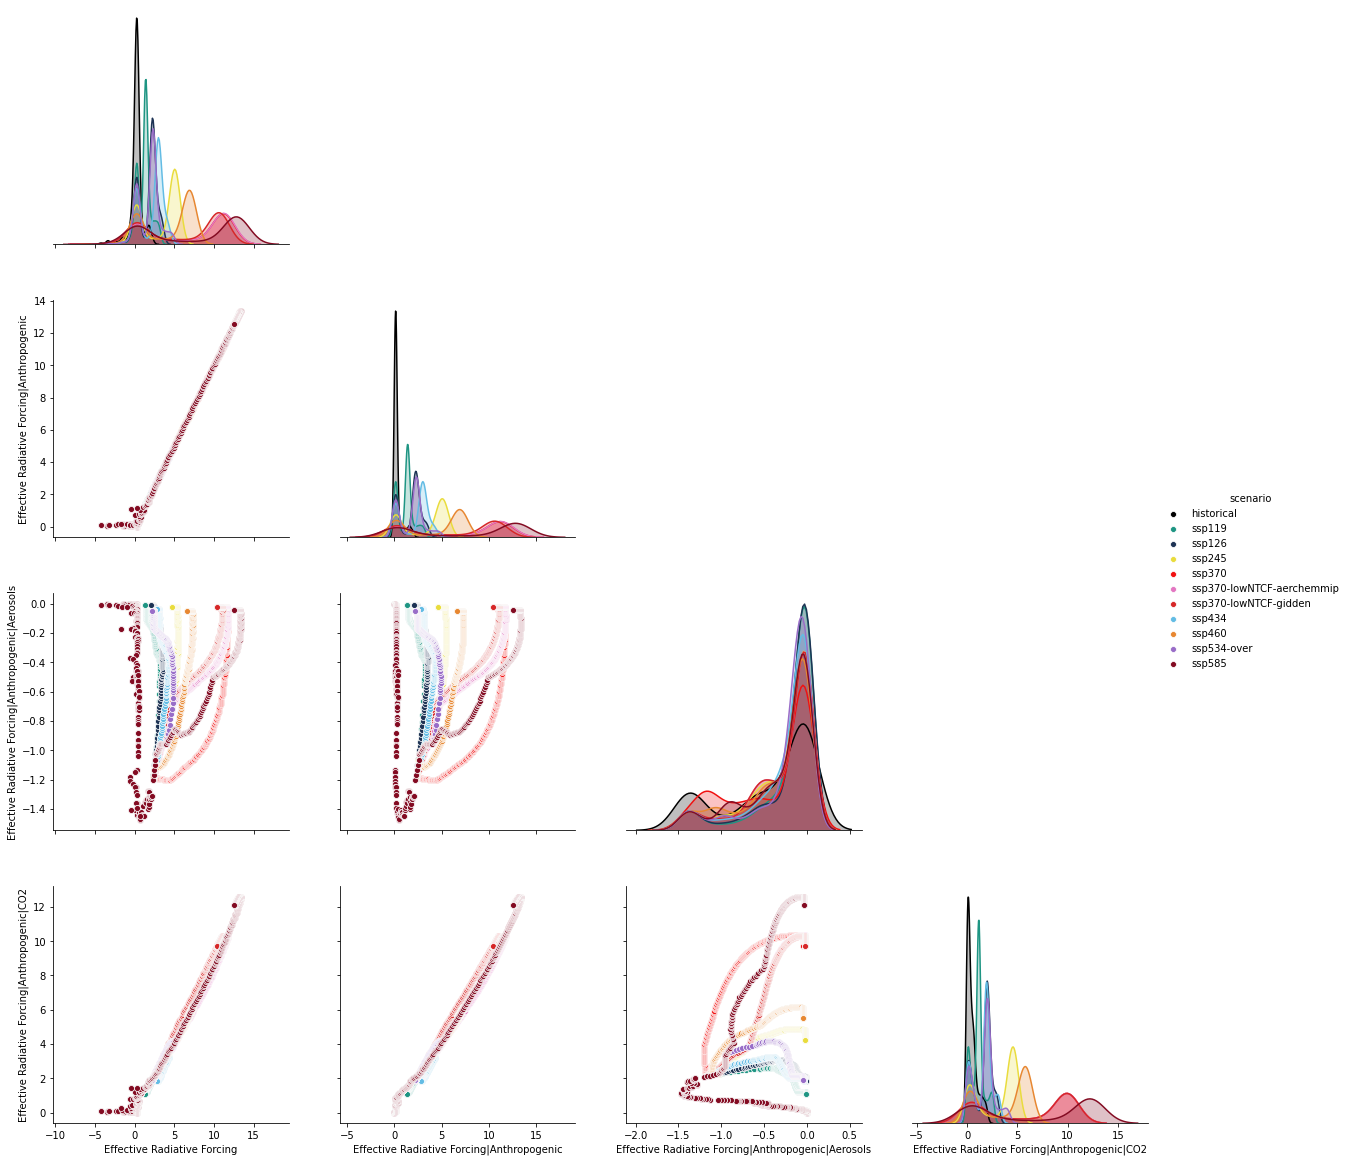

In [12]:
sns.pairplot(
    ts_reshaped,
    hue="scenario",
    palette=scenario_colours,
    hue_order=scenario_colours.keys(),
    corner=True,
    height=4,
)